In [9]:
import numpy as np

import pyabc
from pyabc import Distribution, RV, ABCSMC


def model(p):
    return {'ss1': p['theta'] + 1 + 0.1 * np.random.normal(),
            'ss2': 2 + 10 * np.random.normal()}

# true model parameter
refval = {'theta': 3}

# observed summary statistics
obs = {'ss1': refval['theta'] + 1, 'ss2': 5}

# prior distribution
prior = pyabc.Distribution(theta=pyabc.RV('uniform', 0, 10))

distances = [
    pyabc.PNormDistance(),
    pyabc.AdaptivePNormDistance(adaptive=False, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.AdaptivePNormDistance(adaptive=True, scale_function=pyabc.distance.median_absolute_deviation),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=False, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False)),
    pyabc.PNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=True)),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False), adaptive=True),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.LinearPredictorSumstat(normalize_features=True, normalize_labels=False, n_fit=4), adaptive=True),
    pyabc.PNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.AdaptivePNormDistance(sumstat=pyabc.GPPredictorSumstat()),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(predictor=pyabc.MLPPredictor())),
    pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=1,
    )),pyabc.PNormDistance(sumstat=pyabc.PredictorSumstat(
        predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=4,
    )),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=1,
    ),
    pyabc.distance.InfoWeightedPNormDistance(predictor=pyabc.ModelSelection(
            predictors=[pyabc.LinearPredictor(), pyabc.GPPredictor()]
        ),
        n_fit=4,
    ),
]

labels = [
    'Euclidean',
    'Calibrated Euclidean',
    'Adaptive Euclidean',
    'Learned linear nn',
    'Learned linear tn',
    'Learned linear tt',
    'Adaptive + LL tn',
    'Adaptive + LL tn n_fit=4',
    'GP',
    'Adaptive GP',
    'MLP',
    'Model selection',
    'Model selection n_fit=4',
    'Info weighted ms',
    'Info weighted ms n_fit=4',
]

def plot_history(history: pyabc.History, label: str):
    fig, ax = plt.subplots(1,1)
    ax
    for t in range(history.max_t + 1):
        df, w = history.get_distribution(m=0, t=t)
        pyabc.visualization.plot_kde_1d(df, w, xmin=0, xmax=10, numx=300, refval=refval,
                                        x='theta', xname="$\theta$", ax=ax,
                                        label="PDF t={}".format(t))
    ax.axvline(0, color='k', linestyle='dashed', label="True value")
    ax.legend()
    ax.set_title(label)

In [10]:
hs = []

for distance, label in zip(distances, labels):
    print(label)
    abc = ABCSMC(model, prior, distance, population_size=100)
    abc.new(pyabc.create_sqlite_db_id(), obs)
    h = abc.run(max_total_nr_simulations=1e4)
    hs.append(h)

INFO:Sampler:Parallelizing the sampling on 4 cores.
INFO:History:Start <ABCSMC id=166, start_time=2021-03-29 00:28:09.829355>
INFO:ABC:Calibration sample t=-1.


Euclidean


INFO:Epsilon:initial epsilon is 9.095876848804332
INFO:ABC:t: 0, eps: 9.095876848804332.
INFO:ABC:Acceptance rate: 100 / 159 = 6.2893e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 5.81353199048548.
INFO:ABC:Acceptance rate: 100 / 306 = 3.2680e-01, ESS=9.7096e+01.
INFO:ABC:t: 2, eps: 3.577413366144711.
INFO:ABC:Acceptance rate: 100 / 588 = 1.7007e-01, ESS=9.9319e+01.
INFO:ABC:t: 3, eps: 2.5577468963724335.
INFO:ABC:Acceptance rate: 100 / 836 = 1.1962e-01, ESS=9.8068e+01.
INFO:ABC:t: 4, eps: 1.6777285896250647.
INFO:ABC:Acceptance rate: 100 / 1076 = 9.2937e-02, ESS=9.7877e+01.
INFO:ABC:t: 5, eps: 1.1905269549982391.
INFO:ABC:Acceptance rate: 100 / 1512 = 6.6138e-02, ESS=9.8289e+01.
INFO:ABC:t: 6, eps: 0.779124495450286.
INFO:ABC:Acceptance rate: 100 / 2535 = 3.9448e-02, ESS=9.6448e+01.
INFO:ABC:t: 7, eps: 0.574808880544537.
INFO:ABC:Acceptance rate: 100 / 3662 = 2.7307e-02, ESS=9.2562e+01.
INFO:pyabc.util:Stopping: total simulations budget.
INFO:History:Done <ABCSMC id=166, duration=0:00:08.1

Calibrated Euclidean


INFO:Epsilon:initial epsilon is 1.8225134201039872
INFO:ABC:t: 0, eps: 1.8225134201039872.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.258143788851106.
INFO:ABC:Acceptance rate: 100 / 195 = 5.1282e-01, ESS=9.7910e+01.
INFO:ABC:t: 2, eps: 0.9388596883722758.
INFO:ABC:Acceptance rate: 100 / 300 = 3.3333e-01, ESS=9.8450e+01.
INFO:ABC:t: 3, eps: 0.6150476934430285.
INFO:ABC:Acceptance rate: 100 / 527 = 1.8975e-01, ESS=9.9573e+01.
INFO:ABC:t: 4, eps: 0.40417173013477997.
INFO:ABC:Acceptance rate: 100 / 670 = 1.4925e-01, ESS=9.6914e+01.
INFO:ABC:t: 5, eps: 0.28778068649822736.
INFO:ABC:Acceptance rate: 100 / 782 = 1.2788e-01, ESS=9.3944e+01.
INFO:ABC:t: 6, eps: 0.18878367063227244.
INFO:ABC:Acceptance rate: 100 / 1328 = 7.5301e-02, ESS=8.9828e+01.
INFO:ABC:t: 7, eps: 0.14296853600210913.
INFO:ABC:Acceptance rate: 100 / 1837 = 5.4437e-02, ESS=9.5810e+01.
INFO:ABC:t: 8, eps: 0.09888521305437391.
INFO:ABC:Acceptance rate: 100 / 2362 = 4.2337e-02, ESS=

Adaptive Euclidean


INFO:Epsilon:initial epsilon is 1.9319737082712198
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 1.9319737082712198.
INFO:ABC:Acceptance rate: 100 / 191 = 5.2356e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.1593801356909486.
INFO:ABC:Acceptance rate: 100 / 323 = 3.0960e-01, ESS=9.3270e+01.
INFO:ABC:t: 2, eps: 0.9282622114928264.
INFO:ABC:Acceptance rate: 100 / 431 = 2.3202e-01, ESS=9.9348e+01.
INFO:ABC:t: 3, eps: 0.7787423484149428.
INFO:ABC:Acceptance rate: 100 / 482 = 2.0747e-01, ESS=9.9598e+01.
INFO:ABC:t: 4, eps: 0.7608938940839485.
INFO:ABC:Acceptance rate: 100 / 516 = 1.9380e-01, ESS=9.8076e+01.
INFO:ABC:t: 5, eps: 0.70132781355699.
INFO:ABC:Acceptance rate: 100 / 545 = 1.8349e-01, ESS=9.7716e+01.
INFO:ABC:t: 6, eps: 0.6936088650322146.
INFO:ABC:Acceptance rate: 100 / 677 = 1.4771e-01, ESS=9.2772e+01.
INFO:ABC:t: 7, eps: 0.5924673015229086.
INFO:ABC:Acceptance rate: 100 / 1191 = 8.3963e-02, ESS=9.1706e+01.
INFO:ABC:t: 8, eps: 0.4461601946518805.
INFO:A

Learned linear nn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 2.152919484771179
INFO:ABC:t: 0, eps: 2.152919484771179.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.1344869751645903.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=9.9470e+01.
INFO:ABC:t: 2, eps: 0.6146063809072513.
INFO:ABC:Acceptance rate: 100 / 193 = 5.1813e-01, ESS=9.9739e+01.
INFO:ABC:t: 3, eps: 0.33915283718118694.
INFO:ABC:Acceptance rate: 100 / 194 = 5.1546e-01, ESS=9.4791e+01.
INFO:ABC:t: 4, eps: 0.1771811652220683.
INFO:ABC:Acceptance rate: 100 / 224 = 4.4643e-01, ESS=9.7189e+01.
INFO:ABC:t: 5, eps: 0.09280663317739717.
INFO:ABC:Acceptance rate: 100 / 281 = 3.5587e-01, ESS=9.4236e+01.
INFO:ABC:t: 6, eps: 0.04881197811407108.
INFO:ABC:Acceptance rate: 100 / 335 = 2.9851e-01, ESS=6.6372e+00.
INFO:ABC:t: 7, eps: 0.03323173356506684.
INFO:ABC:Acceptance rate: 100 / 904 = 1.1062e-01, ESS=9.5810e+01.
INFO:ABC:t: 8, eps: 0.01642605106244421.
INFO:ABC:Acceptance 

Learned linear tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 2.16980852020425
INFO:ABC:t: 0, eps: 2.16980852020425.
INFO:ABC:Acceptance rate: 100 / 271 = 3.6900e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1.037309399261579.
INFO:ABC:Acceptance rate: 100 / 223 = 4.4843e-01, ESS=9.9993e+01.
INFO:ABC:t: 2, eps: 0.5678428741941328.
INFO:ABC:Acceptance rate: 100 / 202 = 4.9505e-01, ESS=9.9570e+01.
INFO:ABC:t: 3, eps: 0.2739302981235969.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=9.9259e+01.
INFO:ABC:t: 4, eps: 0.16036956340215167.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01, ESS=9.6579e+01.
INFO:ABC:t: 5, eps: 0.08361886199276525.
INFO:ABC:Acceptance rate: 100 / 288 = 3.4722e-01, ESS=9.2203e+01.
INFO:ABC:t: 6, eps: 0.04745811724754139.
INFO:ABC:Acceptance rate: 100 / 485 = 2.0619e-01, ESS=8.8641e+01.
INFO:ABC:t: 7, eps: 0.026757835927091193.
INFO:ABC:Acceptance rate: 100 / 555 = 1.8018e-01, ESS=8.3250e+01.
INFO:ABC:t: 8, eps: 0.012713441995502376.
INFO:ABC:Acceptance r

Learned linear tt


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.8947754460949398
INFO:ABC:t: 0, eps: 0.8947754460949398.
INFO:ABC:Acceptance rate: 100 / 211 = 4.7393e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.46146383057743234.
INFO:ABC:Acceptance rate: 100 / 242 = 4.1322e-01, ESS=9.9908e+01.
INFO:ABC:t: 2, eps: 0.22942300501074214.
INFO:ABC:Acceptance rate: 100 / 197 = 5.0761e-01, ESS=9.7078e+01.
INFO:ABC:t: 3, eps: 0.11468326821305044.
INFO:ABC:Acceptance rate: 100 / 235 = 4.2553e-01, ESS=9.8965e+01.
INFO:ABC:t: 4, eps: 0.059645725198499484.
INFO:ABC:Acceptance rate: 100 / 235 = 4.2553e-01, ESS=9.7794e+01.
INFO:ABC:t: 5, eps: 0.030273146159759356.
INFO:ABC:Acceptance rate: 100 / 276 = 3.6232e-01, ESS=8.9068e+01.
INFO:ABC:t: 6, eps: 0.014419481965199705.
INFO:ABC:Acceptance rate: 100 / 469 = 2.1322e-01, ESS=4.3366e+01.
INFO:ABC:t: 7, eps: 0.009479452375048898.
INFO:ABC:Acceptance rate: 100 / 702 = 1.4245e-01, ESS=8.0505e+01.
INFO:ABC:t: 8, eps: 0.004584167800711942.
INFO:ABC:A

Adaptive + LL tn


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.8951826012508426
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.8951826012508426.
INFO:ABC:Acceptance rate: 100 / 225 = 4.4444e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.4637317924880551.
INFO:ABC:Acceptance rate: 100 / 188 = 5.3191e-01, ESS=9.9764e+01.
INFO:ABC:t: 2, eps: 0.4528978752562306.
INFO:ABC:Acceptance rate: 100 / 182 = 5.4945e-01, ESS=9.9573e+01.
INFO:ABC:t: 3, eps: 0.4704002424956454.
INFO:ABC:Acceptance rate: 100 / 214 = 4.6729e-01, ESS=9.9318e+01.
INFO:ABC:t: 4, eps: 0.3575521627453068.
INFO:ABC:Acceptance rate: 100 / 251 = 3.9841e-01, ESS=9.8379e+01.
INFO:ABC:t: 5, eps: 0.29404562980072907.
INFO:ABC:Acceptance rate: 100 / 254 = 3.9370e-01, ESS=9.2372e+01.
INFO:ABC:t: 6, eps: 0.21096442830343082.
INFO:ABC:Acceptance rate: 100 / 517 = 1.9342e-01, ESS=8.9655e+01.
INFO:ABC:t: 7, eps: 0.12870609302006294.
INFO:ABC:Acceptance rate: 100 / 722 = 1.3850e-01, ESS=4.6702e+01.
INFO

Adaptive + LL tn n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.8395253458962364
INFO:Population:Recording also rejected particles: True
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.8395253458962364.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 1, eps: 0.4174755077025633.
INFO:ABC:Acceptance rate: 100 / 171 = 5.8480e-01, ESS=9.9688e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 2, eps: 0.4280742534157089.
INFO:ABC:Acceptance rate: 100 / 201 = 4.9751e-01, ESS=9.9828e+01.
INFO:Predictor:Fitted LinearPredictor
INFO:ABC:t: 3, eps: 0.4105153978453127.
INFO:ABC:Acceptance rate: 100 / 221 = 4.5249e-01, ESS=9.9290e+01.
INFO:ABC:t: 4, eps: 0.36513651059057406.
INFO:ABC:Acceptance rate: 100 / 228 = 4.3860e-01, ESS=9.8410e+01.
INFO:ABC:t: 5, eps: 0.32966595103848784.
INFO:ABC:Acceptance rate: 100 / 226 = 4.4248e-01, ESS=9.5845e+01.
INFO:ABC:t: 6, eps: 0.2339067210807676.
INFO:AB

GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 0.8417139657861801
INFO:ABC:t: 0, eps: 0.8417139657861801.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.3306914062253128.
INFO:ABC:Acceptance rate: 100 / 232 = 4.3103e-01, ESS=9.7872e+01.
INFO:ABC:t: 2, eps: 0.17659781273757588.
INFO:ABC:Acceptance rate: 100 / 212 = 4.7170e-01, ESS=9.8037e+01.
INFO:ABC:t: 3, eps: 0.08583161099435666.
INFO:ABC:Acceptance rate: 100 / 209 = 4.7847e-01, ESS=9.8910e+01.
INFO:ABC:t: 4, eps: 0.04216760247243213.
INFO:ABC:Acceptance rate: 100 / 231 = 4.3290e-01, ESS=8.8762e+01.
INFO:ABC:t: 5, eps: 0.020446923027933217.
INFO:ABC:Acceptance rate: 100 / 369 = 2.7100e-01, ESS=8.7168e+01.
INFO:ABC:t: 6, eps: 0.010923677723089933.
INFO:ABC:Acceptance rate: 100 / 684 = 1.4620e-01, ESS=8.2615e+01.
INFO:ABC:t: 7, eps: 0.005271739288010573.
INFO:ABC:Acceptance rate: 100 / 1292 = 7.7399e-02, ESS=9.0580e+01.
INFO:ABC:t: 8, eps: 0.0030468060993067408.
INFO:ABC:Accep

Adaptive GP


INFO:Predictor:Fitted GPPredictor
INFO:Epsilon:initial epsilon is 0.865935875129854
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.865935875129854.
INFO:ABC:Acceptance rate: 100 / 195 = 5.1282e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.4813590438336827.
INFO:ABC:Acceptance rate: 100 / 209 = 4.7847e-01, ESS=9.8847e+01.
INFO:ABC:t: 2, eps: 0.39223507661171475.
INFO:ABC:Acceptance rate: 100 / 186 = 5.3763e-01, ESS=9.9932e+01.
INFO:ABC:t: 3, eps: 0.49108128476006546.
INFO:ABC:Acceptance rate: 100 / 184 = 5.4348e-01, ESS=9.9783e+01.
INFO:ABC:t: 4, eps: 0.4765741125095569.
INFO:ABC:Acceptance rate: 100 / 206 = 4.8544e-01, ESS=9.7698e+01.
INFO:ABC:t: 5, eps: 0.4246038565649812.
INFO:ABC:Acceptance rate: 100 / 208 = 4.8077e-01, ESS=8.3928e+01.
INFO:ABC:t: 6, eps: 0.26372086324237115.
INFO:ABC:Acceptance rate: 100 / 400 = 2.5000e-01, ESS=8.6752e+01.
INFO:ABC:t: 7, eps: 0.1283553045996222.
INFO:ABC:Acceptance rate: 100 / 813 = 1.2300e-01, ESS=5.8873e+01.
INFO:ABC:t

MLP


/home/yannik/anaconda3/envs/env/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
INFO:Predictor:Fitted MLPPredictor
INFO:Epsilon:initial epsilon is 0.9586449847270719
INFO:ABC:t: 0, eps: 0.9586449847270719.
INFO:ABC:Acceptance rate: 100 / 181 = 5.5249e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.4141422821382688.
INFO:ABC:Acceptance rate: 100 / 189 = 5.2910e-01, ESS=9.9717e+01.
INFO:ABC:t: 2, eps: 0.21054498164525826.
INFO:ABC:Acceptance rate: 100 / 226 = 4.4248e-01, ESS=9.8324e+01.
INFO:ABC:t: 3, eps: 0.08927357332865829.
INFO:ABC:Acceptance rate: 100 / 239 = 4.1841e-01, ESS=9.8500e+01.
INFO:ABC:t: 4, eps: 0.04129013649637194.
INFO:ABC:Acceptance rate: 100 / 254 = 3.9370e-01, ESS=9.2256e+01.
INFO:ABC:t: 5, eps: 0.02112304041005353.
INFO:ABC:Acceptance rate: 100 / 340 = 2.9412e-01, ESS=8.8076e+01

Model selection


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.64e-01
INFO:Predictor:Score GPPredictor: 2.00e-01
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.7526595202205604
INFO:ABC:t: 0, eps: 0.7526595202205604.
INFO:ABC:Acceptance rate: 100 / 229 = 4.3668e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.38611348638241483.
INFO:ABC:Acceptance rate: 100 / 192 = 5.2083e-01, ESS=9.9134e+01.
INFO:ABC:t: 2, eps: 0.19448422430220016.
INFO:ABC:Acceptance rate: 100 / 244 = 4.0984e-01, ESS=9.9664e+01.
INFO:ABC:t: 3, eps: 0.09763911542276704.
INFO:ABC:Acceptance rate: 100 / 207 = 4.8309e-01, ESS=9.9644e+01.
INFO:ABC:t: 4, eps: 0.060907721278

Model selection n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.62e-01
INFO:Predictor:Score GPPredictor: 1.88e-01
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 0.8620559824610601
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 0.8620559824610601.
INFO:ABC:Acceptance rate: 100 / 204 = 4.9020e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predic

Info weighted ms


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.75e-01
INFO:Predictor:Score GPPredictor: 1.95e-01
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 2.317890235241372
INFO:ABC:t: 0, eps: 2.317890235241372.
INFO:ABC:Acceptance rate: 100 / 199 = 5.0251e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 0.980558379565458.
INFO:ABC:Acceptance rate: 100 / 215 = 4.6512e-01, ESS=9.9085e+01.
INFO:ABC:t: 2, eps: 0.4702421105868127.
INFO:ABC:Acceptance rate: 100 / 213 = 4.6948e-01, ESS=9.9647e+01.
INFO:ABC:t: 3, eps: 0.2314503024823186.
INFO:ABC:Acceptance rate: 100 / 206 = 4.8544e-01, ESS=9.8586e+01.
INFO:ABC:t: 4, eps: 0.11122546325333418.

Info weighted ms n_fit=4


INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Score LinearPredictor: 1.73e-01
INFO:Predictor:Score GPPredictor: 1.98e-01
INFO:Predictor:Fitted LinearPredictor
INFO:Epsilon:initial epsilon is 2.6231767616386
INFO:Population:Recording also rejected particles: True
INFO:ABC:t: 0, eps: 2.6231767616386.
INFO:ABC:Acceptance rate: 100 / 221 = 4.5249e-01, ESS=1.0000e+02.
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fitted LinearPredictor
INFO:Predictor:Fitted GPPredictor
INFO:Predictor:Fi

<AxesSubplot:title={'center':'Required samples'}, xlabel='Run', ylabel='Samples'>

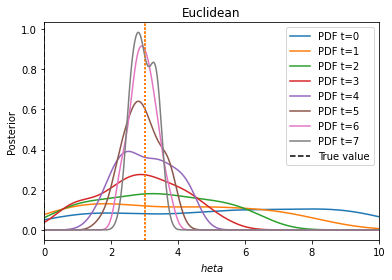

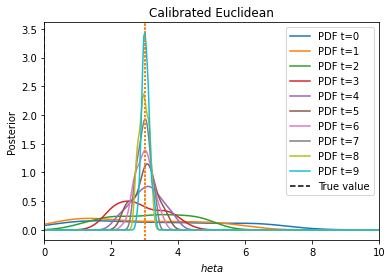

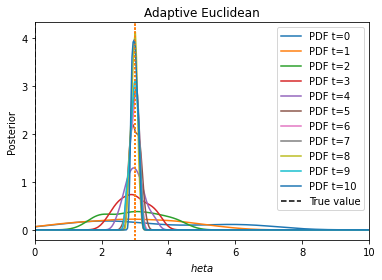

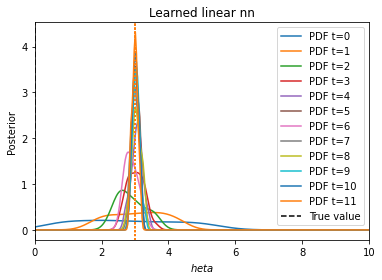

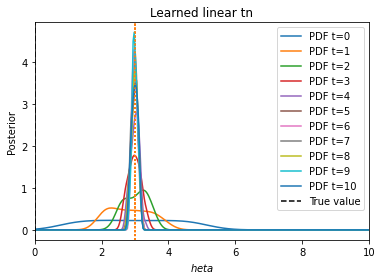

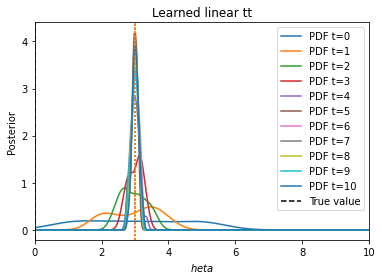

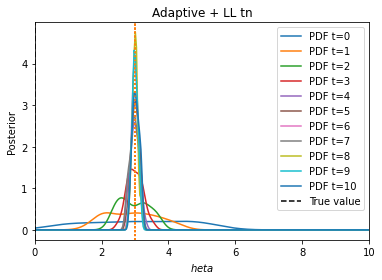

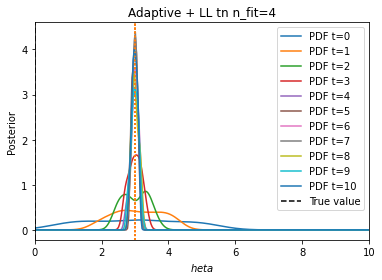

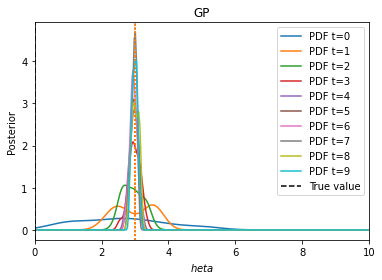

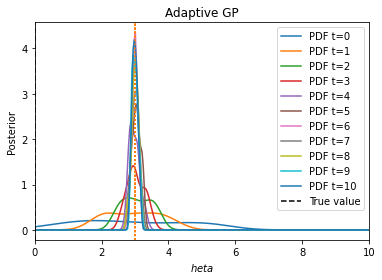

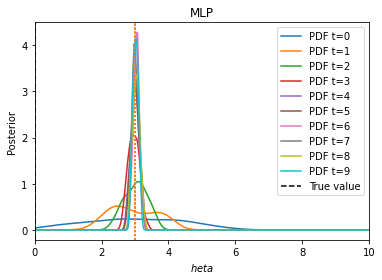

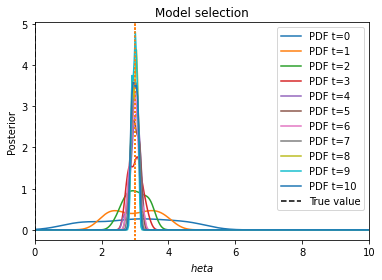

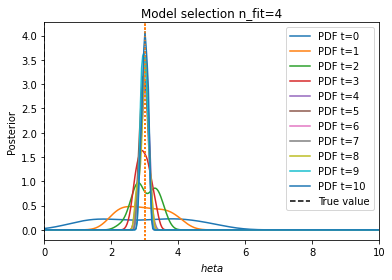

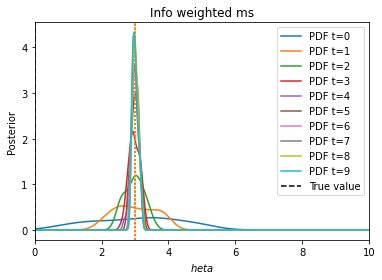

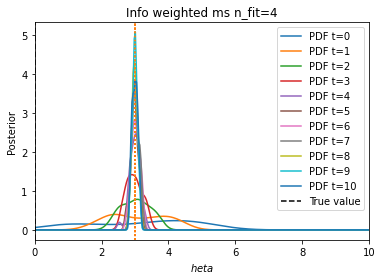

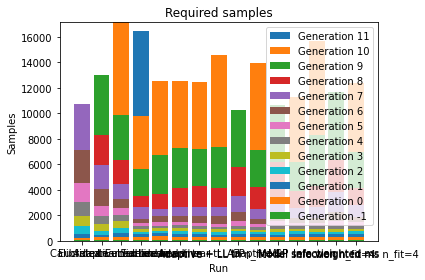

In [11]:
import matplotlib.pyplot as plt

for h, label in zip(hs, labels):
    plot_history(h, label)
pyabc.visualization.plot_sample_numbers(hs, labels)